## Hacker's earth Hackathon

In [42]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
ds_train=pd.read_csv("C:\\Users\\Adhvaidh\\Desktop\\HackerEarth ML comp\\dataset\\train.csv")
ds_test=pd.read_csv("C:\\Users\\Adhvaidh\\Desktop\\HackerEarth ML comp\\dataset\\test.csv")

In [43]:
ds_train.head(2)

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
0,BRAE2NF6JA5GUEXG,37.0,2015-08-22 18:36:12.000,2,Lillyann,Yes,Fashion,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700
1,TUNE8SFB6RJN2HSD,38.0,2016-03-27 21:19:13.000,24,Klynn,Yes,Fashion,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256


In [44]:
ds_test.head(2)

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price
0,SCHE4YSTDVPVZVXW,39.0,2016-01-13 07:45:08.000,205,Ivanka,No,Fashion,0,90,0,380.0,16.0,2576.0,3340
1,ACCEGCATKHNRXUHW,49.0,2015-08-23 20:37:05.000,3,Isaak,Yes,Fashion,0,87,0,393.0,16.0,1202.0,1955


In [45]:
ds_train['instock_date']=pd.to_datetime(ds_train['instock_date'],errors = 'coerce')
ds_test['instock_date']=pd.to_datetime(ds_test['instock_date'],errors = 'coerce')

In [46]:
ds_train.head(2)

,Product_id,Stall_no,instock_date,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,Selling_Price
0,BRAE2NF6JA5GUEXG,37.0,2015-08-22 18:36:12,2,Lillyann,Yes,Fashion,1,68,0.0,376.0,11.0,2983.0,4713.0,4185.947700
1,TUNE8SFB6RJN2HSD,38.0,2016-03-27 21:19:13,24,Klynn,Yes,Fashion,0,51,0.0,397.0,12.0,7495.0,10352.0,9271.490256


In [47]:
ds_train['instock_year'] = ds_train['instock_date'].dt.year
ds_train['instock_month'] = ds_train['instock_date'].dt.month
ds_train['instock_week'] = ds_train['instock_date'].dt.week
ds_train['instock_day'] = ds_train['instock_date'].dt.day
ds_train['instock_hour'] = ds_train['instock_date'].dt.hour
ds_train['instock_minute'] = ds_train['instock_date'].dt.minute
ds_train['instock_dayofweek'] = ds_train['instock_date'].dt.dayofweek

In [49]:
ds_test['instock_year'] = ds_test['instock_date'].dt.year
ds_test['instock_month'] = ds_test['instock_date'].dt.month
ds_test['instock_week'] = ds_test['instock_date'].dt.week
ds_test['instock_day'] = ds_test['instock_date'].dt.day
ds_test['instock_hour'] = ds_test['instock_date'].dt.hour
ds_test['instock_minute'] = ds_test['instock_date'].dt.minute
ds_test['instock_dayofweek'] = ds_test['instock_date'].dt.dayofweek

In [51]:
ds_train = ds_train.drop(['instock_date'], axis=1)
ds_test = ds_test.drop(['instock_date'], axis=1)

In [52]:
ds_train.isnull().sum()

Product_id             0
Stall_no               5
Market_Category        0
Customer_name        211
Loyalty_customer       0
Product_Category       0
Grade                  0
Demand                 0
Discount_avail        38
charges_1            198
charges_2 (%)        205
Minimum_price         38
Maximum_price        343
Selling_Price         41
instock_year           0
instock_month          0
instock_week           0
instock_day            0
instock_hour           0
instock_minute         0
instock_dayofweek      0
dtype: int64

In [53]:
ds_train.describe(include = 'all')

,Product_id,Stall_no,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,...,Minimum_price,Maximum_price,Selling_Price,instock_year,instock_month,instock_week,instock_day,instock_hour,instock_minute,instock_dayofweek
count,6368,6363.000000,6368.000000,6157,6368,6368,6368.000000,6368.000000,6330.000000,6170.000000,...,6330.000000,6025.000000,6327.000000,6368.000000,6368.000000,6368.000000,6368.000000,6368.000000,6368.000000,6368.000000
unique,6368,NaN,NaN,5900,2,10,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,BRAE5PKZGT7AMYZJ,NaN,NaN,Aryan,Yes,Pet_care,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,2,3887,682,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,25.309445,199.340609,NaN,NaN,NaN,0.643687,50.921168,0.140442,264.514100,...,3531.349763,6432.545892,4563.242592,2015.319410,6.409862,27.160804,17.892117,13.756438,28.077889,2.833543
std,NaN,14.328980,170.275570,NaN,NaN,NaN,1.025092,29.091922,0.347473,124.483056,...,2194.729604,3716.177364,2979.102408,0.485751,3.326065,14.899303,8.067962,6.895496,16.711530,1.877410
min,NaN,1.000000,0.000000,NaN,NaN,NaN,0.000000,1.000000,0.000000,100.000000,...,1.000000,404.000000,-6062.470000,2014.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,NaN,13.000000,55.000000,NaN,NaN,NaN,0.000000,26.000000,0.000000,163.000000,...,1879.250000,3918.000000,2450.005280,2015.000000,3.000000,13.000000,9.000000,7.000000,15.000000,1.000000
50%,NaN,25.000000,132.000000,NaN,NaN,NaN,0.000000,51.000000,0.000000,252.000000,...,3157.500000,5634.000000,4210.384640,2015.000000,8.000000,34.000000,20.000000,15.000000,25.000000,3.000000
75%,NaN,37.000000,403.000000,NaN,NaN,NaN,2.000000,76.000000,0.000000,314.000000,...,4697.000000,8126.000000,6167.643252,2016.000000,9.000000,39.000000,24.000000,19.000000,41.000000,4.000000


In [54]:
#Selling price has some negative values

In [55]:
ds_train[ds_train['Selling_Price'] <0]

,Product_id,Stall_no,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,...,Minimum_price,Maximum_price,Selling_Price,instock_year,instock_month,instock_week,instock_day,instock_hour,instock_minute,instock_dayofweek
50,WSCEFUV4TVWT73ZB,3.0,0,Henry,Yes,Child_care,0,27,0.0,289.0,...,2368.0,4231.0,-3584.795550,2014,11,44,1,9,46,5
952,BOTEGYTZ2T6WUJMM,22.0,23,Benjamin,Yes,Pet_care,2,12,0.0,102.0,...,1390.0,5665.0,-3630.896874,2014,10,42,18,23,59,5
1000,WATECHFU4QGFQEJG,15.0,437,Audrey,No,Child_care,0,74,0.0,254.0,...,3885.0,5485.0,-4896.104400,2015,1,4,19,17,23,0
1115,DREED6FKBQXMDWGM,14.0,55,NaN,Yes,Pet_care,0,77,0.0,169.0,...,3829.0,6083.0,-5077.185300,2015,5,19,6,16,21,2
1348,WATEAYZJBFJXB4FZ,44.0,256,Tristan,Yes,Repair,0,22,0.0,285.0,...,2873.0,6511.0,-4965.495150,2015,3,9,1,0,31,6
1674,SHOE3URGKNFYXDGP,46.0,283,Steven,Yes,Pet_care,0,57,0.0,135.0,...,1975.0,2601.0,-2408.406912,2015,5,19,5,13,19,1
2035,WSCEG2FYDYFDSVZ6,41.0,236,Dylan,Yes,Hospitality,0,10,0.0,255.0,...,1320.0,7873.0,-4855.154436,2014,10,44,29,12,46,2
2486,BELEG6KUK6ZBFTZJ,14.0,437,Aubrey,Yes,Child_care,0,19,0.0,331.0,...,4044.0,5395.0,-5058.014148,2014,11,45,9,20,15,6
3890,TOPDWSEVWXVQ4GXU,28.0,1,Cesar,Yes,Cosmetics,0,1,0.0,208.0,...,2614.0,4891.0,-3966.103350,2015,5,19,6,14,20,2
4188,RNGE7M92QK8FW7ZD,28.0,14,Zaylee,No,Hospitality,0,23,1.0,325.0,...,4322.0,NaN,-822.810319,2015,8,33,16,23,12,6


In [56]:
#14 -ve values

In [57]:
ds_train = ds_train[ds_train['Selling_Price'] > 0]#Dropping all 14 -ve values

In [58]:
ds_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6313 entries, 0 to 6367
Data columns (total 21 columns):
Product_id           6313 non-null object
Stall_no             6308 non-null float64
Market_Category      6313 non-null int64
Customer_name        6107 non-null object
Loyalty_customer     6313 non-null object
Product_Category     6313 non-null object
Grade                6313 non-null int64
Demand               6313 non-null int64
Discount_avail       6276 non-null float64
charges_1            6116 non-null float64
charges_2 (%)        6109 non-null float64
Minimum_price        6275 non-null float64
Maximum_price        5973 non-null float64
Selling_Price        6313 non-null float64
instock_year         6313 non-null int64
instock_month        6313 non-null int64
instock_week         6313 non-null int64
instock_day          6313 non-null int64
instock_hour         6313 non-null int64
instock_minute       6313 non-null int64
instock_dayofweek    6313 non-null int64
dtypes: float6

In [59]:
def check_missing_data(df):
    flag=df.isna().sum().any()
    if flag==True:
        total = df.isnull().sum()
        percent = round((df.isnull().sum())/(df.isnull().count()),3)*100
        output = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
        data_type = []
        for col in df.columns:
            dtype = str(df[col].dtype)
            data_type.append(dtype)
        output['Types'] = data_type
        return(np.transpose(output))
    else:
        return(False)
    
check_missing_data(ds_train)

,Product_id,Stall_no,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,...,Minimum_price,Maximum_price,Selling_Price,instock_year,instock_month,instock_week,instock_day,instock_hour,instock_minute,instock_dayofweek
Total,0,5,0,206,0,0,0,0,37,197,...,38,340,0,0,0,0,0,0,0,0
Percent,0,0.1,0,3.3,0,0,0,0,0.6,3.1,...,0.6,5.4,0,0,0,0,0,0,0,0
Types,object,float64,int64,object,object,object,int64,int64,float64,float64,...,float64,float64,float64,int64,int64,int64,int64,int64,int64,int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B82494F978>]],
      dtype=object)

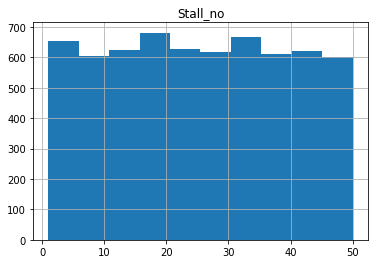

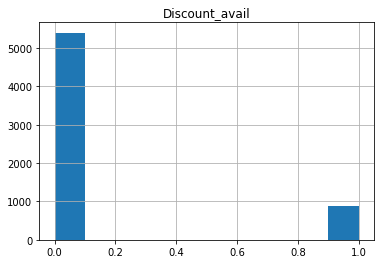

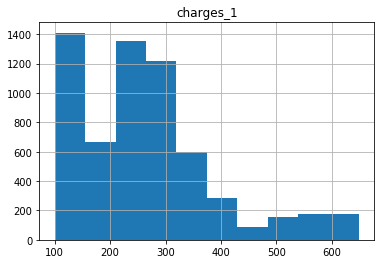

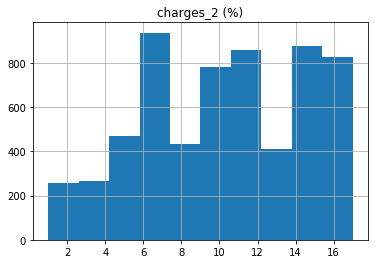

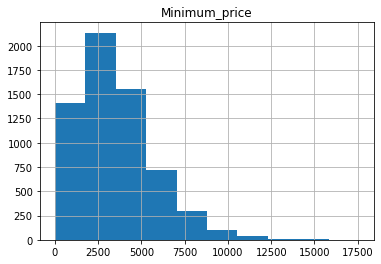

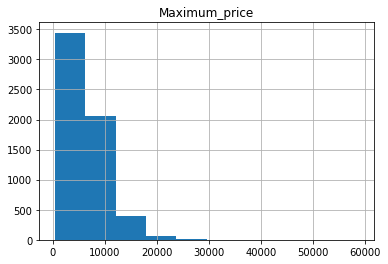

In [60]:
ds_train.hist('Stall_no')
ds_train.hist('Discount_avail')
ds_train.hist('charges_1')
ds_train.hist('charges_2 (%)')
ds_train.hist('Minimum_price')
ds_train.hist('Maximum_price')

In [61]:
ds_train['Stall_no'] = ds_train['Stall_no'].fillna(ds_train.Stall_no.mean()) # because the hist is not normally distribted

ds_train['Discount_avail'] = ds_train['Discount_avail'].fillna(ds_train.Discount_avail.median()) # because the hist is not normally distribted

ds_train['charges_1'] = ds_train['charges_1'].fillna(ds_train.charges_1.median()) # because the hist is skewed

ds_train['charges_2 (%)'] = ds_train['charges_2 (%)'].fillna(ds_train['charges_2 (%)'].median()) # because the hist is skewed

ds_train['Minimum_price'] = ds_train['Minimum_price'].fillna(ds_train.Minimum_price.median()) # because the hist is skewed

ds_train['Maximum_price'] = ds_train['Maximum_price'].fillna(ds_train.Maximum_price.median()) # because the hist is skewed

In [62]:
check_missing_data(ds_train)

,Product_id,Stall_no,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,...,Minimum_price,Maximum_price,Selling_Price,instock_year,instock_month,instock_week,instock_day,instock_hour,instock_minute,instock_dayofweek
Total,0,0,0,206,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Percent,0,0,0,3.3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Types,object,float64,int64,object,object,object,int64,int64,float64,float64,...,float64,float64,float64,int64,int64,int64,int64,int64,int64,int64


In [63]:
ds_train['Customer_name'] = ds_train['Customer_name'].fillna(ds_train.Customer_name.mode()[0])

In [64]:
check_missing_data(ds_train)

False

In [65]:
ds_train.describe(include='all')

,Product_id,Stall_no,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,...,Minimum_price,Maximum_price,Selling_Price,instock_year,instock_month,instock_week,instock_day,instock_hour,instock_minute,instock_dayofweek
count,6313,6313.000000,6313.000000,6313,6313,6313,6313.000000,6313.000000,6313.000000,6313.000000,...,6313.000000,6313.000000,6313.000000,6313.000000,6313.000000,6313.000000,6313.000000,6313.000000,6313.000000,6313.000000
unique,6313,NaN,NaN,5855,2,10,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,BRAE5PKZGT7AMYZJ,NaN,NaN,1,Yes,Pet_care,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,208,3852,674,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,25.318484,199.063520,NaN,NaN,NaN,0.644860,50.933787,0.139395,264.320450,...,3532.740535,6394.979408,4581.963224,2015.323143,6.393315,27.092983,17.897513,13.750040,28.074133,2.830667
std,NaN,14.325914,170.291209,NaN,NaN,NaN,1.025945,29.085824,0.346386,122.625342,...,2189.001823,3623.136276,2954.607090,0.485334,3.329174,14.915916,8.075145,6.901713,16.732610,1.878940
min,NaN,1.000000,0.000000,NaN,NaN,NaN,0.000000,1.000000,0.000000,100.000000,...,1.000000,404.000000,36.000000,2014.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,NaN,13.000000,55.000000,NaN,NaN,NaN,0.000000,26.000000,0.000000,166.000000,...,1890.000000,4021.000000,2461.266432,2015.000000,3.000000,13.000000,9.000000,7.000000,15.000000,1.000000
50%,NaN,25.000000,131.000000,NaN,NaN,NaN,0.000000,51.000000,0.000000,253.000000,...,3165.000000,5639.000000,4215.972992,2015.000000,8.000000,34.000000,20.000000,15.000000,25.000000,3.000000
75%,NaN,37.000000,403.000000,NaN,NaN,NaN,2.000000,76.000000,0.000000,310.000000,...,4694.000000,7938.000000,6171.778600,2016.000000,9.000000,39.000000,24.000000,19.000000,41.000000,4.000000


In [66]:
from sklearn.preprocessing import LabelEncoder 
enc_loy_cust=LabelEncoder()
ds_train['Loyalty_customer'] = enc_loy_cust.fit_transform(ds_train['Loyalty_customer'])

In [67]:
enc_prod_cat=LabelEncoder()
ds_train['Product_Category'] = enc_prod_cat.fit_transform(ds_train['Product_Category'])

In [68]:
enc_cust_name=LabelEncoder()
ds_train['Customer_name'] = enc_cust_name.fit_transform(ds_train['Customer_name'])

In [69]:
enc_prod_id=LabelEncoder()
ds_train['Product_id'] = enc_prod_id.fit_transform(ds_train['Product_id'])

In [70]:
ds_train.isnull().sum()

Product_id           0
Stall_no             0
Market_Category      0
Customer_name        0
Loyalty_customer     0
Product_Category     0
Grade                0
Demand               0
Discount_avail       0
charges_1            0
charges_2 (%)        0
Minimum_price        0
Maximum_price        0
Selling_Price        0
instock_year         0
instock_month        0
instock_week         0
instock_day          0
instock_hour         0
instock_minute       0
instock_dayofweek    0
dtype: int64

In [71]:
check_missing_data(ds_test)

,Product_id,Stall_no,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,instock_year,instock_month,instock_week,instock_day,instock_hour,instock_minute,instock_dayofweek
Total,0,1,0,53,0,0,0,0,0,36,5,14,0,0,0,0,0,0,0,0
Percent,0,0,0,1.5,0,0,0,0,0,1,0.1,0.4,0,0,0,0,0,0,0,0
Types,object,float64,int64,object,object,object,int64,int64,int64,float64,float64,float64,int64,int64,int64,int64,int64,int64,int64,int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B824D10C88>]],
      dtype=object)

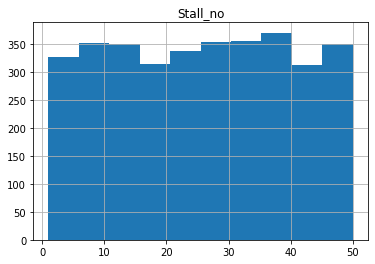

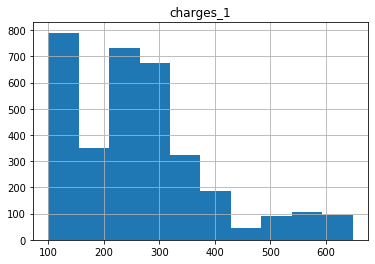

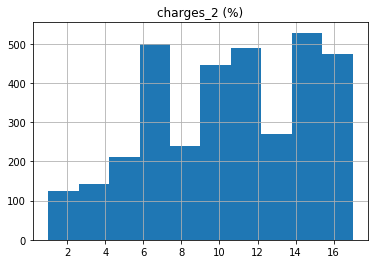

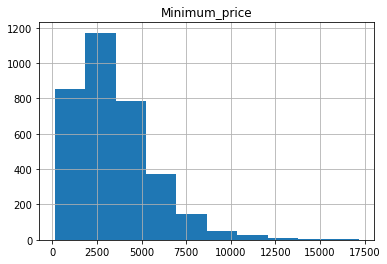

In [72]:
ds_test.hist('Stall_no')
ds_test.hist('charges_1')
ds_test.hist('charges_2 (%)')
ds_test.hist('Minimum_price')

In [73]:
ds_test['Stall_no'] = ds_test['Stall_no'].fillna(ds_test.Stall_no.mean()) # because the hist is not normally distribted

ds_test['charges_1'] = ds_test['charges_1'].fillna(ds_test.charges_1.median()) # because the hist is skewed

ds_test['charges_2 (%)'] = ds_test['charges_2 (%)'].fillna(ds_test['charges_2 (%)'].median()) # because the hist is skewed

ds_test['Minimum_price'] = ds_test['Minimum_price'].fillna(ds_test.Minimum_price.median()) # because the hist is skewed


In [74]:
check_missing_data(ds_test)

,Product_id,Stall_no,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,charges_2 (%),Minimum_price,Maximum_price,instock_year,instock_month,instock_week,instock_day,instock_hour,instock_minute,instock_dayofweek
Total,0,0,0,53,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Percent,0,0,0,1.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Types,object,float64,int64,object,object,object,int64,int64,int64,float64,float64,float64,int64,int64,int64,int64,int64,int64,int64,int64


In [75]:
ds_test['Customer_name'] = ds_test['Customer_name'].fillna(ds_test.Customer_name.mode()[0])

In [76]:
check_missing_data(ds_test)

False

In [77]:
ds_test['Loyalty_customer'] = enc_loy_cust.fit_transform(ds_test['Loyalty_customer'])
ds_test['Product_Category'] = enc_prod_cat.fit_transform(ds_test['Product_Category'])
ds_test['Customer_name'] = enc_cust_name.fit_transform(ds_test['Customer_name'])
ds_test['Product_id'] = enc_prod_id.fit_transform(ds_test['Product_id'])

In [78]:
ds_train.head()

,Product_id,Stall_no,Market_Category,Customer_name,Loyalty_customer,Product_Category,Grade,Demand,Discount_avail,charges_1,...,Minimum_price,Maximum_price,Selling_Price,instock_year,instock_month,instock_week,instock_day,instock_hour,instock_minute,instock_dayofweek
0,536,37.0,2,3698,1,3,1,68,0.0,376.0,...,2983.0,4713.0,4185.947700,2015,8,34,22,18,36,5
1,5897,38.0,24,3419,1,3,0,51,0.0,397.0,...,7495.0,10352.0,9271.490256,2016,3,12,27,21,19,6
2,805,9.0,447,4781,1,0,0,10,0.0,250.0,...,5752.0,7309.0,6785.701362,2015,8,34,18,19,25,1
3,6093,50.0,23,67,1,2,2,48,0.0,144.0,...,5090.0,20814.0,13028.917824,2016,3,13,28,21,53,0
4,2313,7.0,63,1736,1,8,1,35,1.0,211.0,...,2430.0,9261.0,906.553935,2016,3,13,29,22,58,1


In [79]:
ds_train.columns

Index(['Product_id', 'Stall_no', 'Market_Category', 'Customer_name',
       'Loyalty_customer', 'Product_Category', 'Grade', 'Demand',
       'Discount_avail', 'charges_1', 'charges_2 (%)', 'Minimum_price',
       'Maximum_price', 'Selling_Price', 'instock_year', 'instock_month',
       'instock_week', 'instock_day', 'instock_hour', 'instock_minute',
       'instock_dayofweek'],
      dtype='object')

In [80]:
colneeded=[f for f in ds_train.columns if f not in ['Selling_Price']]
colneeded

['Product_id',
 'Stall_no',
 'Market_Category',
 'Customer_name',
 'Loyalty_customer',
 'Product_Category',
 'Grade',
 'Demand',
 'Discount_avail',
 'charges_1',
 'charges_2 (%)',
 'Minimum_price',
 'Maximum_price',
 'instock_year',
 'instock_month',
 'instock_week',
 'instock_day',
 'instock_hour',
 'instock_minute',
 'instock_dayofweek']

In [81]:
from sklearn.model_selection import train_test_split
X=ds_train[colneeded]
y=ds_train['Selling_Price']
X_train, X_valid, y_train, y_valid = train_test_split(X, y,test_size = 0.3, random_state = 42)

In [82]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor

In [106]:
from sklearn.model_selection import GridSearchCV
grid_val={'max_depth':[6], 'n_estimators':[2000], 'learning_rate':[0.02],'objective': ['reg:linear'],'tree_method':["auto"],'random_state': [42],'colsample_bytree': [0.6],'subsample': [0.6],'eval_metric': ["rmse"],'gamma': [0.1],'reg_alpha': [0.4],'min_child_weight': [4,5,6]}
xgb = XGBRegressor() 
xgb_grid = GridSearchCV(xgb,grid_val,cv = 5,n_jobs = 5,verbose=True)

In [107]:
xgb_grid.fit(X_train,y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  15 out of  15 | elapsed:  1.7min finished


[11:54:09] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=5, estimator=XGBRegressor(), n_jobs=5,
             param_grid={'colsample_bytree': [0.6], 'eval_metric': ['rmse'],
                         'gamma': [0.1], 'learning_rate': [0.02],
                         'max_depth': [6], 'min_child_weight': [4, 5, 6],
                         'n_estimators': [2000], 'objective': ['reg:linear'],
                         'random_state': [42], 'reg_alpha': [0.4],
                         'subsample': [0.6], 'tree_method': ['auto']},
             verbose=True)

In [108]:
xgb_grid.best_params_

{'colsample_bytree': 0.6,
 'eval_metric': 'rmse',
 'gamma': 0.1,
 'learning_rate': 0.02,
 'max_depth': 6,
 'min_child_weight': 6,
 'n_estimators': 2000,
 'objective': 'reg:linear',
 'random_state': 42,
 'reg_alpha': 0.4,
 'subsample': 0.6,
 'tree_method': 'auto'}

In [ ]:
grid_predictions = xgb_grid.predict(X_valid)

In [109]:
import xgboost as xgb
xgb_reg = xgb.XGBRegressor(max_depth=6, n_estimators=2000, learning_rate=0.02,objective='reg:linear',
                         tree_method='auto',random_state=42,colsample_bytree=0.6,subsample=0.6,
                        eval_metric ="rmse",
                        gamma=0.1,reg_alpha=0.4,min_child_weight = 6)

In [110]:
xgb_reg.fit(X_train, y_train,early_stopping_rounds=10,eval_set=[(X_train, y_train), (X_valid,y_valid)])

[12:07:31] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:5382.52	validation_1-rmse:5287.5
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 10 rounds.
[1]	validation_0-rmse:5278	validation_1-rmse:5185.13
[2]	validation_0-rmse:5186.58	validation_1-rmse:5097.39
[3]	validation_0-rmse:5085.94	validation_1-rmse:4999.05
[4]	validation_0-rmse:4996.78	validation_1-rmse:4911.26
[5]	validation_0-rmse:4900.23	validation_1-rmse:4815.54
[6]	validation_0-rmse:4805.56	validation_1-rmse:4722.14
[7]	validation_0-rmse:4720.79	validation_1-rmse:4639.14
[8]	validation_0-rmse:4640.91	validation_1-rmse:4560.16
[9]	validation_0-rmse:4563.19	validation_1-rmse:4484.74
[10]	validation_0-rmse:4474.83	validation_1-rmse:4398.04
[11]	validation_0-rmse:4388.29	validation_1-rmse:4312.48
[12]	va

[138]	validation_0-rmse:607.33	validation_1-rmse:676.41
[139]	validation_0-rmse:598.809	validation_1-rmse:668.141
[140]	validation_0-rmse:594.16	validation_1-rmse:664.719
[141]	validation_0-rmse:586.075	validation_1-rmse:657.018
[142]	validation_0-rmse:581.706	validation_1-rmse:653.783
[143]	validation_0-rmse:574.027	validation_1-rmse:646.33
[144]	validation_0-rmse:566.468	validation_1-rmse:639.265
[145]	validation_0-rmse:562.538	validation_1-rmse:636.145
[146]	validation_0-rmse:554.988	validation_1-rmse:628.79
[147]	validation_0-rmse:547.607	validation_1-rmse:621.718
[148]	validation_0-rmse:540.702	validation_1-rmse:615.188
[149]	validation_0-rmse:533.444	validation_1-rmse:608.507
[150]	validation_0-rmse:529.781	validation_1-rmse:606.026
[151]	validation_0-rmse:522.98	validation_1-rmse:599.613
[152]	validation_0-rmse:519.693	validation_1-rmse:597.352
[153]	validation_0-rmse:516.431	validation_1-rmse:594.876
[154]	validation_0-rmse:510.086	validation_1-rmse:588.501
[155]	validation_0-r

[280]	validation_0-rmse:273.249	validation_1-rmse:376.964
[281]	validation_0-rmse:272.583	validation_1-rmse:376.218
[282]	validation_0-rmse:272.156	validation_1-rmse:375.833
[283]	validation_0-rmse:271.458	validation_1-rmse:375.209
[284]	validation_0-rmse:270.968	validation_1-rmse:374.612
[285]	validation_0-rmse:270.563	validation_1-rmse:374.513
[286]	validation_0-rmse:269.933	validation_1-rmse:374.02
[287]	validation_0-rmse:269.305	validation_1-rmse:373.719
[288]	validation_0-rmse:268.636	validation_1-rmse:372.993
[289]	validation_0-rmse:268.135	validation_1-rmse:372.443
[290]	validation_0-rmse:267.716	validation_1-rmse:371.942
[291]	validation_0-rmse:267.257	validation_1-rmse:371.883
[292]	validation_0-rmse:266.997	validation_1-rmse:371.824
[293]	validation_0-rmse:266.692	validation_1-rmse:371.497
[294]	validation_0-rmse:266.442	validation_1-rmse:371.403
[295]	validation_0-rmse:266.047	validation_1-rmse:371.136
[296]	validation_0-rmse:265.359	validation_1-rmse:370.559
[297]	validatio

[422]	validation_0-rmse:228.77	validation_1-rmse:344.765
[423]	validation_0-rmse:228.586	validation_1-rmse:344.696
[424]	validation_0-rmse:228.231	validation_1-rmse:344.525
[425]	validation_0-rmse:228.04	validation_1-rmse:344.38
[426]	validation_0-rmse:227.874	validation_1-rmse:344.419
[427]	validation_0-rmse:227.79	validation_1-rmse:344.324
[428]	validation_0-rmse:227.617	validation_1-rmse:344.293
[429]	validation_0-rmse:227.367	validation_1-rmse:344.177
[430]	validation_0-rmse:227.165	validation_1-rmse:344.136
[431]	validation_0-rmse:226.558	validation_1-rmse:343.879
[432]	validation_0-rmse:226.331	validation_1-rmse:343.729
[433]	validation_0-rmse:225.991	validation_1-rmse:343.505
[434]	validation_0-rmse:225.906	validation_1-rmse:343.433
[435]	validation_0-rmse:225.733	validation_1-rmse:343.369
[436]	validation_0-rmse:225.639	validation_1-rmse:343.247
[437]	validation_0-rmse:225.402	validation_1-rmse:343.272
[438]	validation_0-rmse:225.298	validation_1-rmse:343.069
[439]	validation_0

[564]	validation_0-rmse:204.771	validation_1-rmse:338.021
[565]	validation_0-rmse:204.73	validation_1-rmse:337.92
[566]	validation_0-rmse:204.553	validation_1-rmse:337.878
[567]	validation_0-rmse:204.385	validation_1-rmse:337.958
[568]	validation_0-rmse:204.329	validation_1-rmse:337.893
[569]	validation_0-rmse:204.271	validation_1-rmse:337.871
[570]	validation_0-rmse:204.145	validation_1-rmse:337.816
[571]	validation_0-rmse:204.035	validation_1-rmse:337.806
[572]	validation_0-rmse:203.942	validation_1-rmse:337.774
[573]	validation_0-rmse:203.823	validation_1-rmse:337.76
[574]	validation_0-rmse:203.606	validation_1-rmse:337.719
[575]	validation_0-rmse:203.245	validation_1-rmse:337.51
[576]	validation_0-rmse:203.067	validation_1-rmse:337.53
[577]	validation_0-rmse:202.913	validation_1-rmse:337.526
[578]	validation_0-rmse:202.775	validation_1-rmse:337.519
[579]	validation_0-rmse:202.67	validation_1-rmse:337.475
[580]	validation_0-rmse:202.453	validation_1-rmse:337.434
[581]	validation_0-r

XGBRegressor(colsample_bytree=0.6, eval_metric='rmse', gamma=0.1,
             learning_rate=0.02, max_depth=6, min_child_weight=6,
             n_estimators=2000, random_state=42, reg_alpha=0.4, subsample=0.6,
             tree_method='auto')

In [111]:
inv_enc_prod_id = enc_prod_id.inverse_transform(ds_test["Product_id"])
inv_enc_prod_id

array(['SCHE4YSTDVPVZVXW', 'ACCEGCATKHNRXUHW', 'NKCE6GJ5XVJDXNNZ', ...,
       'TUNE8FWQBS7TVVT7', 'NKCEGMUABCRGUZPE', 'RNGE7M92KAQWUBCS'],
      dtype=object)

In [112]:
xgb_pred = xgb_reg.predict(ds_test)
hacker_earth_fin = pd.DataFrame()

In [113]:
hacker_earth_fin["Product_id"] = inv_enc_prod_id

In [114]:
hacker_earth_fin["Selling_Price"] = xgb_pred

In [115]:
hacker_earth_fin["Selling_Price"] = np.where(hacker_earth_fin.Selling_Price < 0, 0,hacker_earth_fin.Selling_Price)

In [116]:
hacker_earth_fin.head()

,Product_id,Selling_Price
0,SCHE4YSTDVPVZVXW,3252.088867
1,ACCEGCATKHNRXUHW,1890.260254
2,NKCE6GJ5XVJDXNNZ,11599.185547
3,NKCEB8BK3ZXDHDHM,9613.780273
4,TOPEFDXSAHRNPF94,5534.575684


In [117]:
hacker_earth_fin.to_csv("Adhvaidh_final_2.csv")